# Clustering Part 2

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib

# DBSCAN Algorithm

DBSCAN(Density-Based Spatial Clustering of Applications with Noise) is a commonly used unsupervised clustering algorithm. DBSCAN does not need to specify the number of clusters. It can automatically detect the number of clusters based on your input data and parameters. More importantly, DBSCAN can find arbitrary shape clusters that k-means are not able to find.

# Algorithm:
a. The algorithm proceeds by arbitrarily picking up a point in the dataset (until all points have been visited).

b. If there are at least ‘minPoint’ points within a radius of ‘ε’ to the point then we consider all these points to be part of the same cluster.

c. The clusters are then expanded by recursively repeating the neighborhood calculation for each neighboring point



A. **Generate "N" spherical training data points.**


General form for points on a circle: 
$$(x, y) = (rcos\theta, rsin\theta)$$
For n such points, i<sup>th</sup> point would have $ \theta = \frac{2 \pi i}{n} $ , i = 0, 1, 2, 3, ... n-1

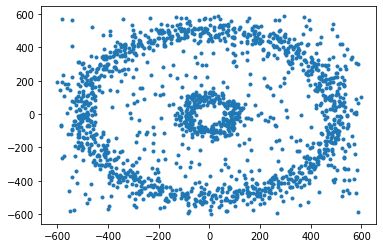

In [7]:
## write your code here
def circularData(radius, noise, n):
    dataset = []
    for i in range(n):
        x = math.cos(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        y = math.sin(2*math.pi*i/n)*radius + np.random.normal(0, noise)
        dataset.append((x, y))
    return dataset

def uniformNoise(bound, n):
    dataset = []
    for i in range(n):
        x = np.random.uniform(-bound, bound)
        y = np.random.uniform(-bound, bound)
        dataset.append((x, y))
    return dataset

outerC = circularData(500, 35, 1000)
innerC = circularData(100, 25, 250)
noisyPts = uniformNoise(600, 400)

plt.figure()
data = pd.DataFrame(outerC)
data = data.append(innerC)
data = data.append(noisyPts)
plt.plot(data[0], data[1], '.')
plt.show()

B. **Perform DBSCAN Algorithm on the above generated data to obtain clusters**

[ 1.  1.  1. ... -1.  3. -1.]


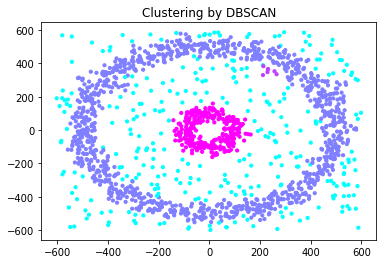

In [23]:
## Write your code here

eps = 30
minpts = 5
x = np.array(data)

def getNeighbours(x, i, eps):
    neighbours = []
    for j in range(0, len(x)):
        # If d<eps , add it to the neighbors list.
        if np.linalg.norm(x[i] - x[j]) < eps:
           neighbours.append(j)
    return neighbours

def populateCluster(x, seed, labels, cluster_id, neighbours, eps, minpts):
    labels[seed] = cluster_id
    i = 0
    while i < len(neighbours):              # sort of Breadth-First-Search
        j = neighbours[i]
        if labels[j] == -1:                 # was earlier labelled as noise
            labels[j] = cluster_id
        elif labels[j] == 0:                # undiscovered point
            labels[j] = cluster_id 
            jNeighbours = getNeighbours(x, j, eps)
            if len(jNeighbours) >= minpts:  # else it's a border point!
                neighbours = neighbours + jNeighbours 
        i = i + 1
            


def MyDBSCAN(eps, minpts, x):
    labels = np.zeros((x.shape[0]))
    # print(labels)
    cluster_id = 0
    for i in range(len(x)):
        if labels[i] != 0:
            continue
        neighbours = getNeighbours(x, i, eps)
        if len(neighbours) < minpts:
            labels[i] = -1         # noise:-1, not considered:0
        else:
            cluster_id = cluster_id + 1
            populateCluster(x, i, labels, cluster_id, neighbours, eps, minpts)
    return labels

# function call
pred_labels = MyDBSCAN(eps, minpts, x)

print(pred_labels)
plt.figure()
plt.scatter(x[:,0], x[:,1], c=pred_labels, s=10, cmap = 'cool');
plt.title("Clustering by DBSCAN")
plt.show()

In [ ]:
import sys
sys.exit()

C. **Experiment by varying the number of min points and epsilon radius and plot your observations**

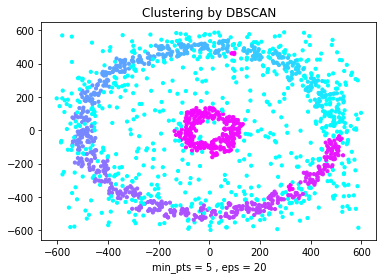

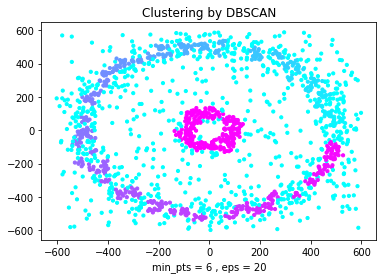

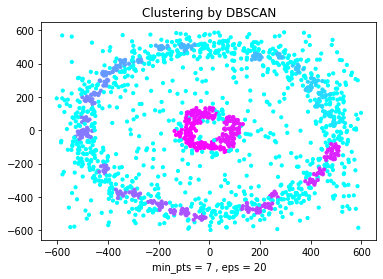

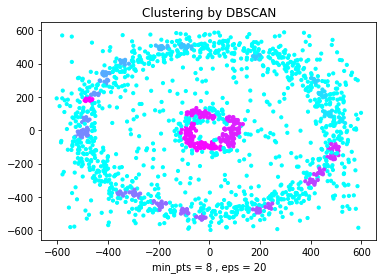

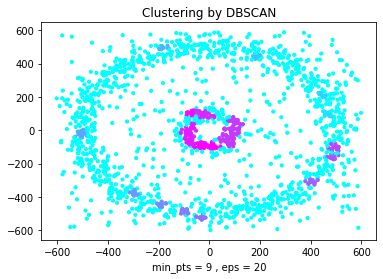

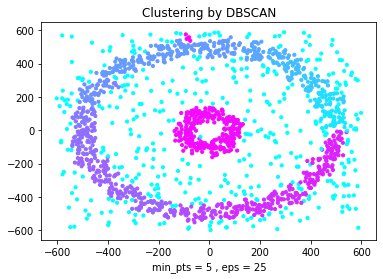

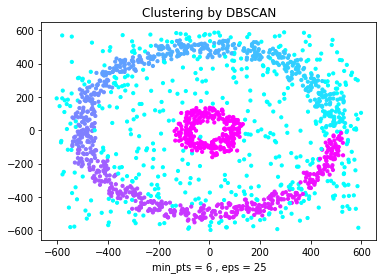

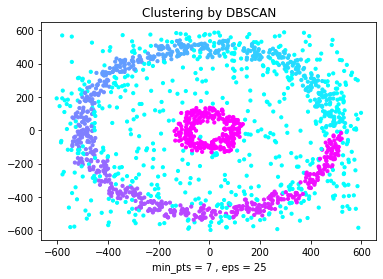

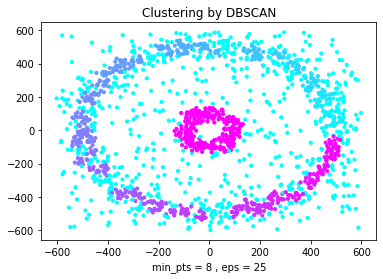

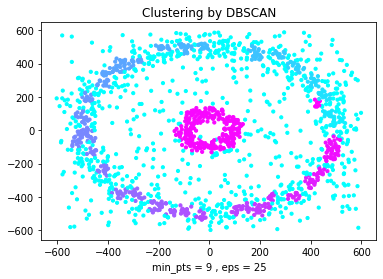

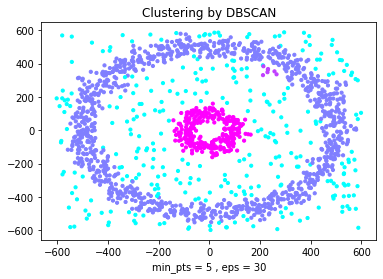

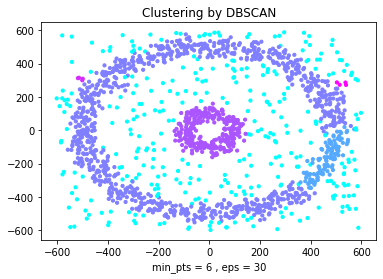

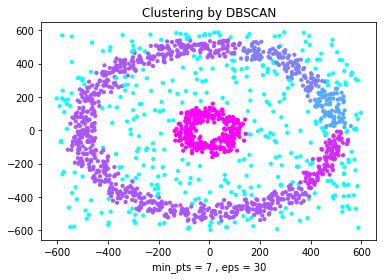

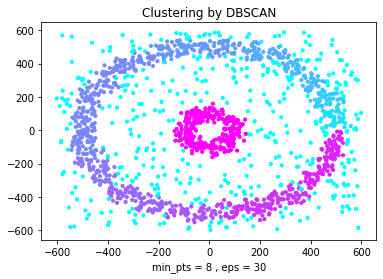

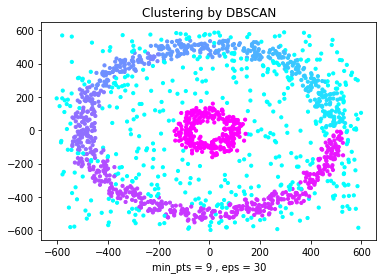

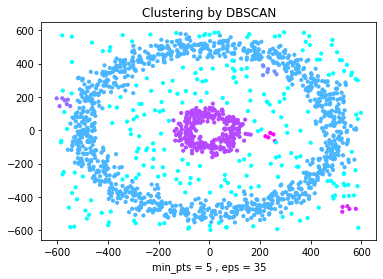

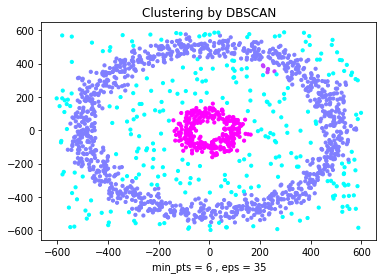

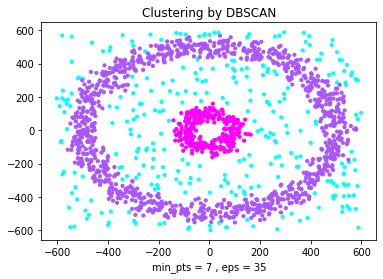

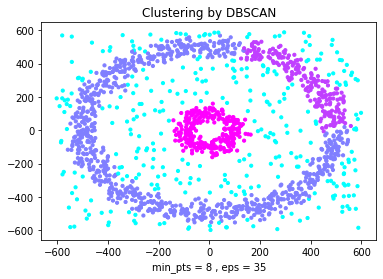

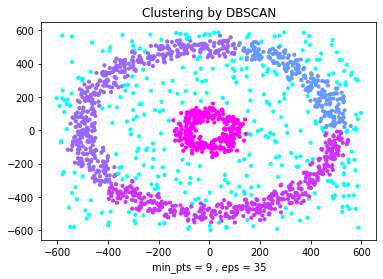

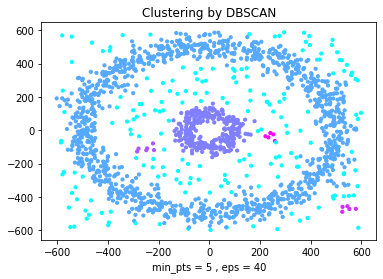

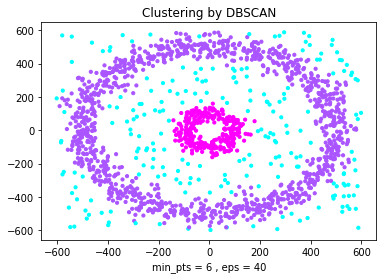

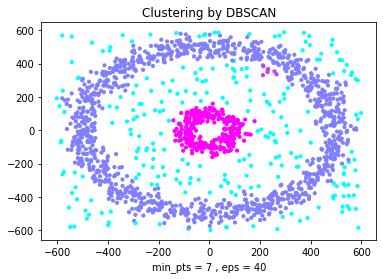

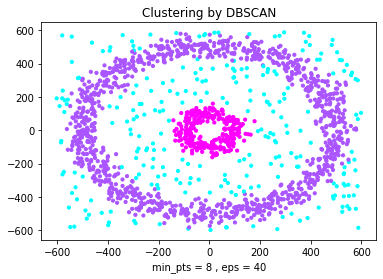

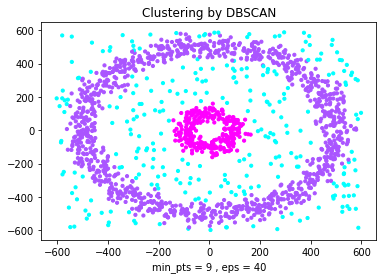

In [27]:
## write your code here
min_pts = [5, 6, 7, 8, 9]
eps_rad = [20, 25, 30, 35, 40]
for i in eps_rad:
    for j in min_pts:
        plabels = MyDBSCAN(i, j, x)
        plt.figure()
        plt.scatter(x[:,0], x[:,1], c=plabels, s=10, cmap = 'cool');
        plt.title("Clustering by DBSCAN")
        plt.xlabel("min_pts = "+str(j)+" , eps = "+str(i))
        plt.show()


D. **Compare your model with the built in DBSCAN in Sci-kit Learn. Also compare you results with GMM and the K-means Algorithm**

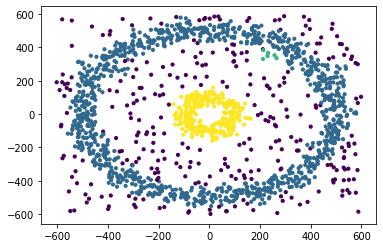

In [28]:
from sklearn.cluster import DBSCAN
## write your code here
dBSCAN = DBSCAN(eps=30, min_samples=5).fit(x)
labels = dBSCAN.labels_
plt.figure()
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)
plt.show()

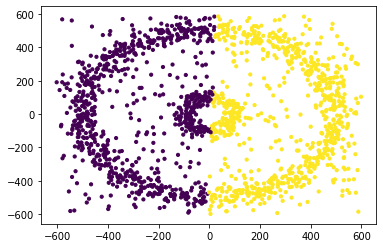

In [30]:
########################################################################
from sklearn.mixture import GaussianMixture
## write your code here
gaussMix = GaussianMixture(n_components=2, random_state=0).fit(x)
labels = gaussMix.predict(x)
plt.scatter(x[:, 0], x[:, 1], s=10, c=labels)



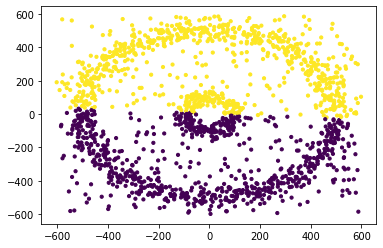

In [33]:
########################################################################
from sklearn.cluster import KMeans
## write your code here
kMeans = KMeans(n_clusters=2, random_state=0).fit(x)
y = kMeans.fit_predict(x)
labels = kMeans.predict(x)
plt.scatter(x[:,0], x[:,1], s=10, c=labels)

# **Fuzzy C-Means Based clustering**

1. Randomly initialize the centroids and clusters K, and compute the probability that each data point xi is a member of a given cluster k, P(point xi has label k|xi, k).

2. Iteration: Recalculate the centroids of the clusters as the weighted centroid given the probabilities of membership of all data points xi:

$$
\mu_k(n+1)=\frac{\sum_{x_i \in k} x_i * P\left(\mu_k \mid x_i\right)^b}{\sum_{x_i \in k} P\left(\mu_k \mid x_i\right)^b}
$$


3. Implement it on the data for which Kmeans was implemented. 

Final Centroids are:
{0: [10.13418269933756, 1.3973708571506926], 1: [5.059005187859031, 0.9080504638950194], 2: [0.4239906840671001, -0.08478758093842885], 3: [4.777470280461181, 5.08826656344572]}


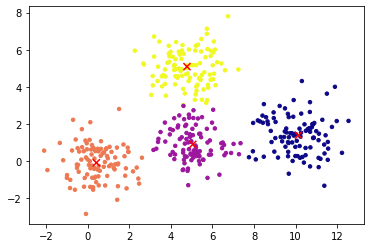

In [15]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt


d1 = np.random.multivariate_normal((0.5, 0.0), np.identity(2), 100)
d2 = np.random.multivariate_normal((5.0, 5.0), np.identity(2), 100)
d3 = np.random.multivariate_normal((5.0, 1.0), np.identity(2), 100)
d4 = np.random.multivariate_normal((10.0, 1.5), np.identity(2), 100)
zeroarr = np.zeros(100)
onearr = np.ones(100)
twoarr = 2*onearr
threearr = 3*onearr
# concatenate all this to form an unlabelled dataset
real_labels = np.concatenate((zeroarr, onearr, twoarr, threearr))
data = np.concatenate((d1,d2,d3,d4))

class FuzzyC:
    # works for only 2D
    """ TODO :
        1) first find c centers randomly and calc dist matr and membership matr
        2) find new centers
        3) find dist matrix
        4) find new membership matrix
        5) Do it till convergence
    """
    # write your code here

    # func for euclidean distance
    def dist(self, a, b):
        d = (a[1] - b[1])**2 + (a[0] - b[0])**2
        return d

    # initialization parameters
    def __init__(self, c, data):
        self.data=data
        self.m=2
        self.n=len(data)
        self.c=c
        self.p=len(data[0])
        self.max_iter=100

    # initialize the 
    def initialize_membership_matrix(self, n, c):
        member_mat = list()
        for i in range(n):
            random_list = [random.random() for x in range(c)]
            summation = sum(random_list)
            for i in range(len(random_list)):
                random_list[i] = random_list[i]/summation
            member_mat.append(random_list)
        return member_mat

    def update_centroid(self, member_mat):
        centroids = {}
        for j in range(self.c):
            temp=[]
            for k in range(self.p):
                
                add = 0
                for i in range(self.n):
                    add = add + member_mat[i][j]**self.m
                x=0
                for i in range(n):
                    x+=(member_mat[i][j]**self.m)*(data[i][k])
                val=x/add
                temp.append(val)
            centroids[j]=temp
        return centroids

    def update_membership_matrix(self, member_mat,centroids):
        ratio=float(2/(self.m-1))

        for i in range(n):
            distances=list()
            for j in range(self.c):
                distances.append(self.dist(data[i],centroids[j]))
            for j in range(c):
                den = sum([math.pow(float(distances[j]/distances[q]), ratio) for q in range(self.c)])
                member_mat[i][j] = float(1/den) 
                
        return member_mat

    def find_cluster(self,member_mat):
        clusters=list()
        for i in range(self.n):
            max_val, idx = max((val, idx) for (idx, val) in enumerate(member_mat[i]))
            clusters.append(idx)
        return clusters

    def check(self,old_member_mat,member_mat):
        diff=0
        for i in range(self.n):
            for j in range(self.c):
                diff+=old_member_mat[i][j]-member_mat[i][j]
        if(diff<0.01):
            return True
        return False

    def fuzzy_c_mean(self):
        member_mat=self.initialize_membership_matrix(n,c)
        for i in range(self.max_iter):
            centroids=self.update_centroid(member_mat)
            old_member_mat=member_mat
            member_mat=self.update_membership_matrix(member_mat,centroids)
            cluster=self.find_cluster(member_mat)
            if(self.check(old_member_mat,member_mat))<0.01:
                print(i)
                break
        return cluster,centroids

fcm = FuzzyC(4, data)
clusters, centroids = fcm.fuzzy_c_mean()

print("Final Centroids are:")
print(centroids)
# plt.scatter(data[:,0], data[:,1], s=12)

x = []
y = []
for i in range(len(centroids)):
    cent = centroids[i]
    x.append(cent[0])
    y.append(cent[1])
# print(clusters)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=clusters, s=12, cmap="plasma")
plt.scatter(x, y, marker='x', color='r', s=50*np.ones(len(centroids)))
plt.show()



# Hierarchical Clustering

Hierarchical clustering is an unsupervised clustering technique which groups together the unlabelled data of similar characteristics.

There are two types of hierarchical clustering:


*   Agglomerative Clustering
*   Divisive Clustering

**Agglomerative Clustering:** 

 In this type of hierarchical clustering all data set are considered as indivisual cluster and at every iterations clusters with similar characteristics are merged to give bigger clusters. This is repeated untill one single cluster is reached. It is also called bottem-top approach.



## Agglomerative Clustering:

Lets start with some dummy example :

X=$[x_1,x_2,...,x_5]$, with

$x_1=\begin{bmatrix} 1\\1\end{bmatrix}$, $x_2=\begin{bmatrix} 2\\1\end{bmatrix}$, $x_3=\begin{bmatrix} 5\\4\end{bmatrix}$, $x_4=\begin{bmatrix} 6\\5\end{bmatrix}$, $x_5=\begin{bmatrix} 6.5\\6\end{bmatrix}$

**Steps to perform Agglomerative Clustering:**





1.   Compute Distance matrix ($N \times N$ matrix, where $N$ number of vectors present in the dataset):
$D(a,b)=||x_{a}-x_{b}||_{2}$
2.   Replace the diagonal elements with $inf$ and find the index of the minimum element present in the distance matrix (suppose we get the location $(l,k)$).
3. Replace $x_{min(l,k)}=.5\times[x_{l}+x_{m}]$ and delete $x_{max(l,m)}$ vector from $X$(i.e now $(N=N-1)$), 

**repeat from step 1 again untill all the vectors combined to a single cluster.**





In [ ]:
def Euclidian_Dist(x,y):
  
  return ## write your code here

def Dist_mat(X):
 ## write your code here
  
  return dist_mat

def combine(X):
  ## write your code here

  return newX


In [ ]:
X=np.array([[1,1],[2,1],[5,4],[6,5],[6.5,6]])
X=X.transpose()

## write your code here

## validate from inbuilt Dendogram
import plotly.figure_factory as ff

lab=np.linspace(1,X.shape[1],X.shape[1])
fig = ff.create_dendrogram(X.T, labels=lab)
fig.update_layout(width=800, height=300)
fig.show()


[[1.  2.  5.  6.  6.5]
 [1.  1.  4.  5.  6. ]]
[[inf 1.  5.  6.4 7.4]
 [1.  inf 4.2 5.7 6.7]
 [5.  4.2 inf 1.4 2.5]
 [6.4 5.7 1.4 inf 1.1]
 [7.4 6.7 2.5 1.1 inf]]
Vector of X to be combined:  [1, 2]
Mean of clusters after every iteration: 
 [[1.5 5.  6.  6.5]
 [1.  4.  5.  6. ]]
[[inf 4.6 6.  7.1]
 [4.6 inf 1.4 2.5]
 [6.  1.4 inf 1.1]
 [7.1 2.5 1.1 inf]]
Vector of X to be combined:  [3, 4]
Mean of clusters after every iteration: 
 [[1.5  5.   6.25]
 [1.   4.   5.5 ]]
[[inf 4.6 6.5]
 [4.6 inf 2. ]
 [6.5 2.  inf]]
Vector of X to be combined:  [2, 3]
Mean of clusters after every iteration: 
 [[1.5   5.625]
 [1.    4.75 ]]
[[inf 5.6]
 [5.6 inf]]
Vector of X to be combined:  [1, 2]
Mean of clusters after every iteration: 
 [[3.5625]
 [2.875 ]]


# Clustering Algorithms on MNIST Digit dataset

Perform Kmeans and gmm clustering on MNIST dataset 


1. Load MNIST data from the given images and labels
2. Consider any 2 classes

In [ ]:
!pip install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7919 sha256=d62daa4e4917a1dd1f07c03e601c5693d6dcd43320a9ae08d8865794ad9a15d5
  Stored in directory: /root/.cache/pip/wheels/1a/ce/ad/d5e95a35cfe34149aade5e500f2edd535c0566d79e9a8e1d8a
Successfully built idx2numpy


(11693, 784)
(11693,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


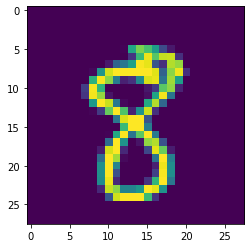

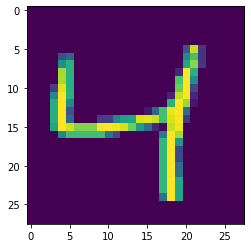

In [ ]:
import idx2numpy
from keras.utils import np_utils
img_path = ## write your code here
label_path = ## write your code here

Images = idx2numpy.convert_from_file(img_path)
labels = idx2numpy.convert_from_file(label_path)

## write your code here


Use the K-means clustering algorithm from the last lab to form the clusters

In [ ]:
## Write your code here

Use the GMM clustering algorithm from the last lab to form the clusters

In [ ]:
## Write your code here

In [ ]:
# see the ck(i) values

fcm.MM[:,0] #of the zeroth element


array([0.08269028, 0.51534414, 0.34882672, 0.05313885])

In [ ]:
fcm.centers # centroid vectors

array([[ 1.39064335, -0.12283597],
       [-0.02070735,  1.51223566],
       [-0.05080079, -0.31583679],
       [-1.30269139, -0.96878818]])